In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, LeaveOneOut
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelBinarizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.tree import plot_tree
from sklearn.metrics import silhouette_score


In [ ]:
# Load dataset
file_path = r'/Users/keshav/Downloads/Dry_Bean_Dataset.xlsx'  # Updated file path
dry_bean_df = pd.read_excel(file_path)

In [ ]:
# Display dataset information
dry_bean_df.info()

In [ ]:
# Preprocessing: Label Encoding for categorical target and scaling
label_encoder = LabelEncoder()
dry_bean_df['Class'] = label_encoder.fit_transform(dry_bean_df['Class'])


In [ ]:
# Prepare features and labels
X = dry_bean_df.drop(columns=['Class'])  # Features
y = dry_bean_df['Class']  # Target (Class of beans)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Standardizing the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

In [ ]:
# Predictions
y_pred = log_reg.predict(X_test_scaled)

In [ ]:
# Classification Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Feature Importance (using model coefficients)
plt.figure(figsize=(12, 8))
importance = np.abs(log_reg.coef_).mean(axis=0)  # Take the mean of absolute coefficients
feature_names = X.columns
sns.barplot(x=importance, y=feature_names)
plt.title("Logistic Regression Feature Importance (Mean Coefficients)")
plt.show()

In [ ]:
# ROC Curve for Logistic Regression
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_pred_prob = log_reg.predict_proba(X_test_scaled)

In [ ]:
# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(lb.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label_encoder.inverse_transform([class_name])[0]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


In [ ]:

'''# Cross Validation using KFold
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
cross_val_scores_kfold = cross_val_score(log_reg, X_scaled, y, cv=kfold)
print(f"KFold CV Accuracy: {np.mean(cross_val_scores_kfold):.4f}")

# Cross Validation using StratifiedKFold
skfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
cross_val_scores_skfold = cross_val_score(log_reg, X_scaled, y, cv=skfold)
print(f"StratifiedKFold CV Accuracy: {np.mean(cross_val_scores_skfold):.4f}")

# Cross Validation using Leave-One-Out
loo = LeaveOneOut()
cross_val_scores_loo = cross_val_score(log_reg, X_scaled, y, cv=loo)
print(f"Leave-One-Out CV Accuracy: {np.mean(cross_val_scores_loo):.4f}")'''


In [ ]:

# Statistical Tests

# F-test (ANOVA)
f_stat, p_value = stats.f_oneway(*[X_train[y_train == i] for i in np.unique(y_train)])
print(f"F-statistic: {f_stat}")
print(f"P-value (F-test): {p_value}")

# T-test
t_stat, p_value_ttest = stats.ttest_ind(X_train[y_train == 0], X_train[y_train == 1])
print(f"T-statistic: {t_stat}")
print(f"P-value (T-test): {p_value_ttest}")

# Chi-square test
chi2_stat, chi2_p_value = chi2(X_train, y_train)
print(f"Chi-square test statistics: {chi2_stat}")
print(f"P-value (Chi-square test): {chi2_p_value}")


In [49]:
# SVM Model (Linear Kernel)
svm_model_linear = SVC(kernel='linear')
svm_model_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear = svm_model_linear.predict(X_test_scaled)

svm_accuracy_linear = accuracy_score(y_test, y_pred_svm_linear)
print("SVM (Linear Kernel) Accuracy:", svm_accuracy_linear)
print("SVM (Linear Kernel) Classification Report:\n", classification_report(y_test, y_pred_svm_linear))


SVM (Linear Kernel) Accuracy: 0.9260528893241919
SVM (Linear Kernel) Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       395
           1       1.00      1.00      1.00       161
           2       0.94      0.93      0.94       479
           3       0.92      0.91      0.92      1043
           4       0.97      0.96      0.96       588
           5       0.95      0.94      0.95       619
           6       0.86      0.89      0.88       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



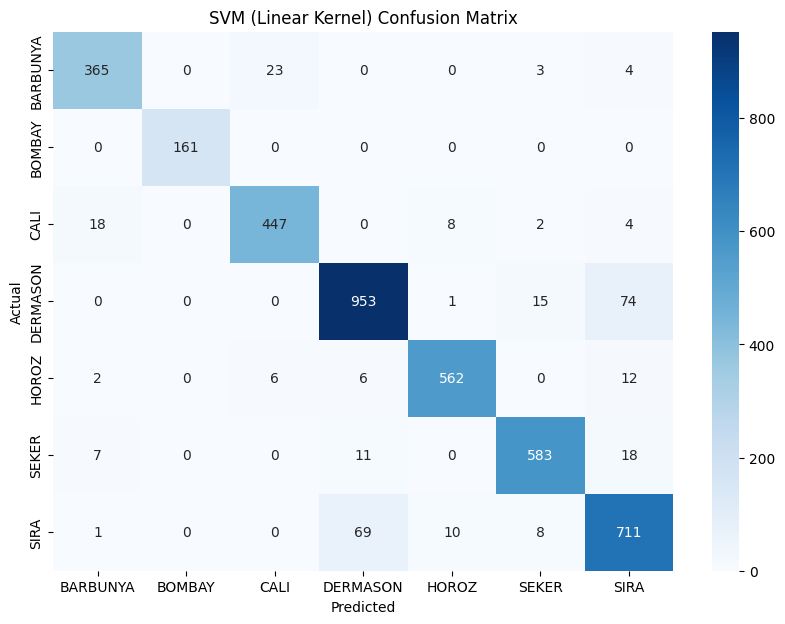

In [50]:
conf_matrix_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm_linear, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("SVM (Linear Kernel) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

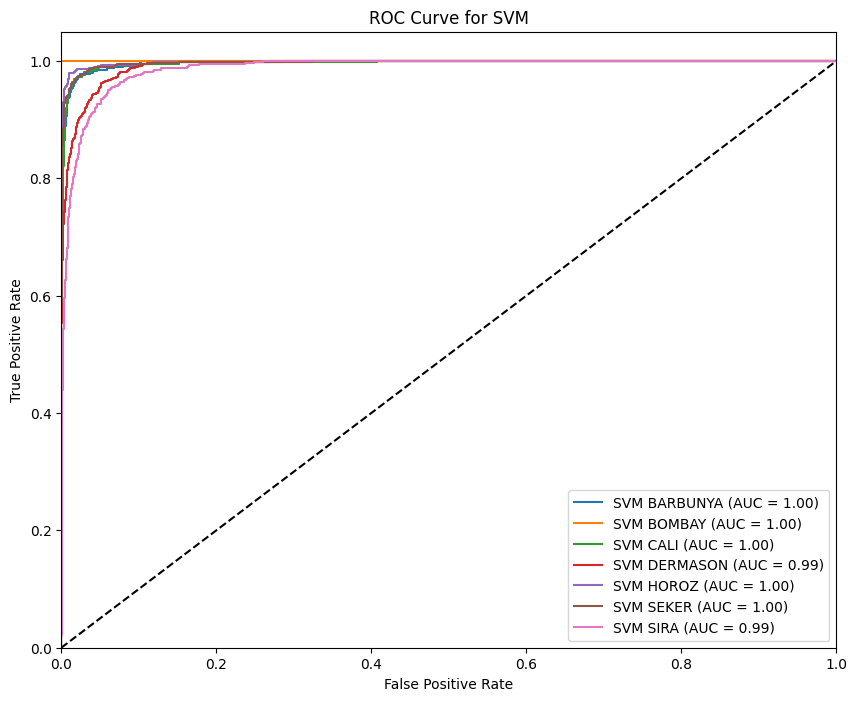

In [57]:
# ---- ROC Curve for SVM (if probabilistic output) and KNN ----
# For SVM, we need to use a probabilistic model to plot ROC curves
# SVM with probability=True allows predict_proba, so we re-train the SVM model

svm_model_prob = SVC(kernel='linear', probability=True, random_state=42)
svm_model_prob.fit(X_train_scaled, y_train)
y_pred_prob_svm = svm_model_prob.predict_proba(X_test_scaled)

# Plot ROC curves for each class for SVM
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(lb.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'SVM {label_encoder.inverse_transform([class_name])[0]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# SVM Model (RBF Kernel)
svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(X_train_scaled, y_train)
y_pred_svm_rbf = svm_model_rbf.predict(X_test_scaled)

svm_accuracy_rbf = accuracy_score(y_test, y_pred_svm_rbf)
print("SVM (RBF Kernel) Accuracy:", svm_accuracy_rbf)
print("SVM (RBF Kernel) Classification Report:\n", classification_report(y_test, y_pred_svm_rbf))



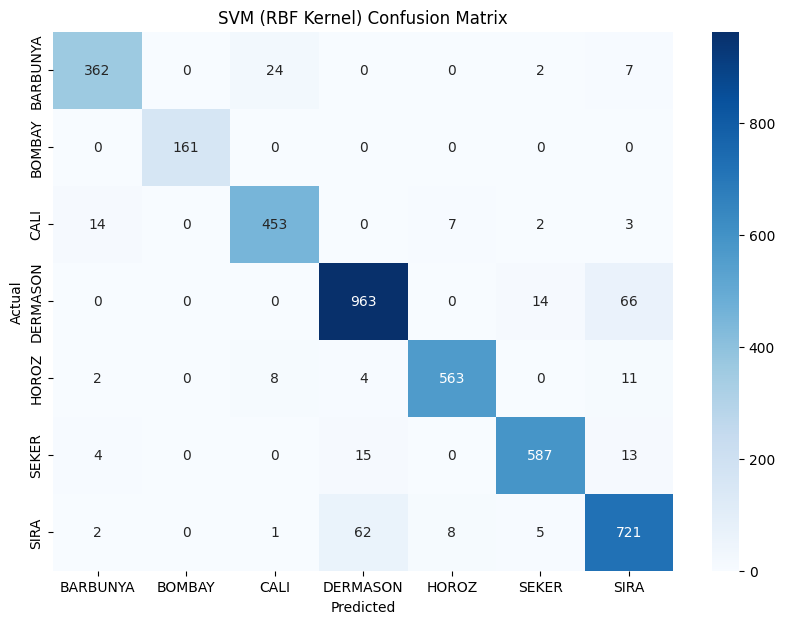

In [51]:
conf_matrix_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm_rbf, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("SVM (RBF Kernel) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

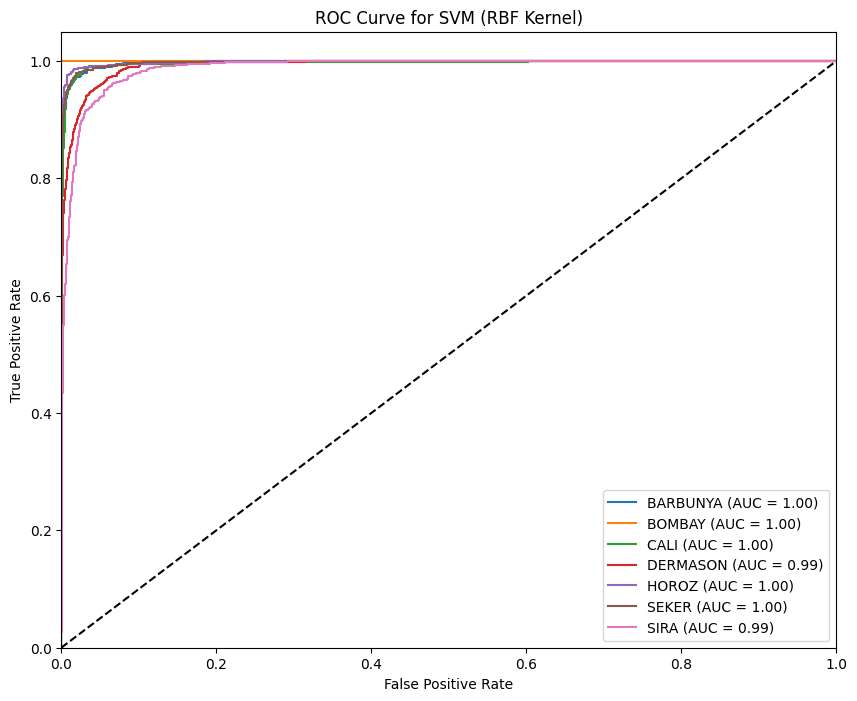

In [56]:
# ---- SVM Model (RBF Kernel) Visualization with ROC Curve ----
# Re-train SVM with RBF kernel and probability=True to get probabilistic outputs
svm_model_rbf_prob = SVC(kernel='rbf', probability=True, random_state=42)
svm_model_rbf_prob.fit(X_train_scaled, y_train)
y_pred_prob_svm_rbf = svm_model_rbf_prob.predict_proba(X_test_scaled)

# Plot ROC curves for each class for SVM with RBF Kernel
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(lb.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob_svm_rbf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label_encoder.inverse_transform([class_name])[0]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM (RBF Kernel)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

In [ ]:
# Evaluate KNN model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", knn_accuracy)
print("KNN Model Classification Report:\n", classification_report(y_test, y_pred_knn))


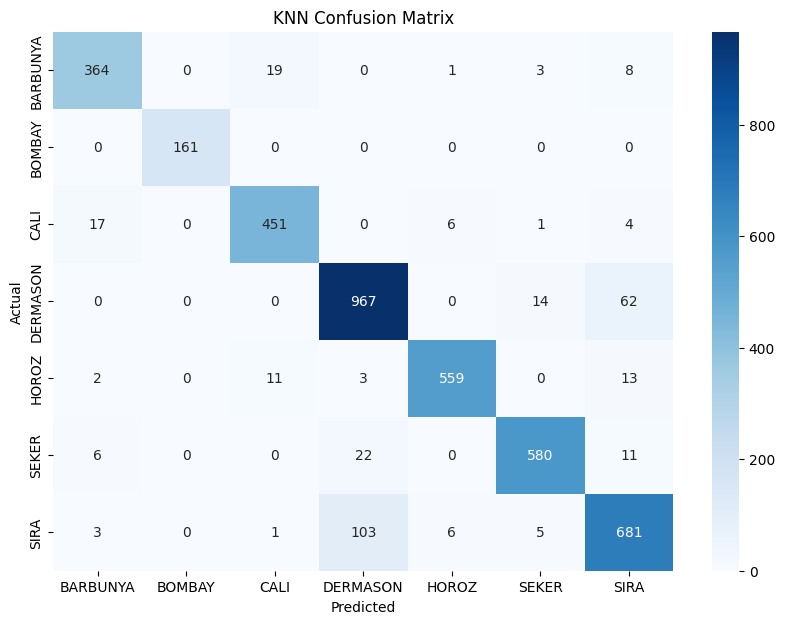

In [52]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)


In [ ]:
# Get the explained variance ratio of each component
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratios of Principal Components: {explained_variance}")


In [ ]:
# Logistic Regression with PCA
log_reg_pca = LogisticRegression(max_iter=1000, random_state=42)
log_reg_pca.fit(X_train_scaled_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_scaled_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Logistic Regression with PCA Accuracy: {accuracy_pca:.4f}")

In [ ]:
# ---- Naive Bayes Model ----
# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

In [ ]:
# Predictions
y_pred_nb = nb_model.predict(X_test_scaled)


In [ ]:
# Classification Metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1-Score: {nb_f1:.4f}")
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


In [ ]:
# Confusion Matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# ---- Clustering ----
# K-Means Clustering
kmeans = KMeans(n_clusters=len(label_encoder.classes_), random_state=42)
kmeans.fit(X_train_scaled)
kmeans_labels = kmeans.labels_


In [ ]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_scaled)


In [ ]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=len(label_encoder.classes_))
agg_labels = agg_clustering.fit_predict(X_train_scaled)


In [ ]:
# Silhouette Scores
kmeans_silhouette = silhouette_score(X_train_scaled, kmeans_labels)
dbscan_silhouette = silhouette_score(X_train_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
agg_silhouette = silhouette_score(X_train_scaled, agg_labels)


In [ ]:
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette:.4f}")


In [ ]:
# Visualization of K-Means Clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
# Visualization of DBSCAN Clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=dbscan.labels_, cmap='plasma', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Visualization of Agglomerative Clustering
plt.figure(figsize=(12, 8))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=agg_labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# ---- Decision Tree Model ----
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)


In [ ]:
# Classification Metrics for Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')



In [ ]:
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))



In [ ]:
# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed for better clarity
plot_tree(dt_model, 
          feature_names=X.columns,  # Feature names from your dataset
          class_names=label_encoder.classes_,  # Class names if available
          filled=True,  # Colors to distinguish classes
          rounded=True,  # Rounded corners for nodes
          fontsize=10)  # Adjust font size for readability

plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
# ---- Random Forest Model ----
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


In [ ]:
# Classification Metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')


In [ ]:
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


In [ ]:
# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Number of trees to visualize (adjust as desired)
num_trees_to_plot = 5
fig, axes = plt.subplots(nrows=1, ncols=num_trees_to_plot, figsize=(20, 5), dpi=100)

# Plot each tree in separate subplots
for i in range(num_trees_to_plot):
    # Plot the ith tree in the ensemble
    plot_tree(rf_model.estimators_[i],
              feature_names=X.columns,
              class_names=label_encoder.classes_,
              filled=True,
              rounded=True,
              ax=axes[i],  # Place each tree in its respective subplot
              fontsize=8)
    axes[i].set_title(f"Tree {i+1}")

plt.tight_layout()
plt.show()


In [ ]:
# Creating a comparison dictionary for all models
model_comparison = {
    "Model": ["Logistic Regression", "Naive Bayes", "SVM (Linear)", "SVM (RBF)", 
              "KNN", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy, nb_accuracy, svm_accuracy_linear, svm_accuracy_rbf, 
                 knn_accuracy, dt_accuracy, rf_accuracy],
    "Precision": [precision, nb_precision, precision_score(y_test, y_pred_svm_linear, average='weighted'), 
                  precision_score(y_test, y_pred_svm_rbf, average='weighted'), 
                  precision_score(y_test, y_pred_knn, average='weighted'), 
                  dt_precision, rf_precision],
    "Recall": [recall, nb_recall, recall_score(y_test, y_pred_svm_linear, average='weighted'), 
               recall_score(y_test, y_pred_svm_rbf, average='weighted'), 
               recall_score(y_test, y_pred_knn, average='weighted'), 
               dt_recall, rf_recall],
    "F1-Score": [f1, nb_f1, f1_score(y_test, y_pred_svm_linear, average='weighted'), 
                 f1_score(y_test, y_pred_svm_rbf, average='weighted'), 
                 f1_score(y_test, y_pred_knn, average='weighted'), 
                 dt_f1, rf_f1]
}

# Converting to DataFrame and displaying the comparison table
comparison_df = pd.DataFrame(model_comparison)
print(comparison_df)


In [ ]:
# Convert dictionary to DataFrame and sort by Accuracy
comparison_df = pd.DataFrame(model_comparison)
comparison_df = comparison_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Display sorted comparison table
print(comparison_df)
